# Q2

In [58]:
import cv2 # just for reading the image 
import numpy as np 
import matplotlib.pyplot as plt

read image "q2.png"

In [59]:
img = cv2.imread("./images/q2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plot the image

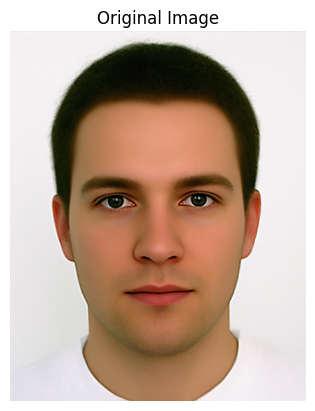

In [60]:
# Plot the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [61]:
def segment(image, seed_point, threshold, neighbor_mode = 0):
    segmented_image = image.copy()
    height, width, channels = image.shape
    seed_value = image[seed_point[1], seed_point[0]]
    segmented_mask = np.zeros((height, width), dtype=np.bool_)
    to_be_checked = [seed_point]

    ### neighbor_mode=0 => 4-connectivity
    if neighbor_mode == 0:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    ### neighbor_mode=0 => 8-connectivity
    else:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while to_be_checked:
        current_point = to_be_checked.pop(0)
        x, y = current_point

        # Check if the current point is within image boundaries and not already checked
        if x < 0 or x >= width or y < 0 or y >= height or segmented_mask[y, x]:
            continue

        current_value = image[y, x]
        # Check if the current pixel is within the threshold
        if np.linalg.norm(current_value - seed_value) <= threshold:
            segmented_mask[y, x] = True
            segmented_image[y, x] = [255, 0, 0]  # Change color to red (desired color)
            for dx, dy in neighbors:
                to_be_checked.append((x + dx, y + dy))

    return segmented_image

In [62]:
seed_point = (100, 170) # Declare seed point
threshold = 150 # Declare threshold

In [63]:
segmented_image_4 = segment(img,seed_point,threshold)
segmented_image_8 = segment(img,seed_point,threshold,1)

plot the results and compare them

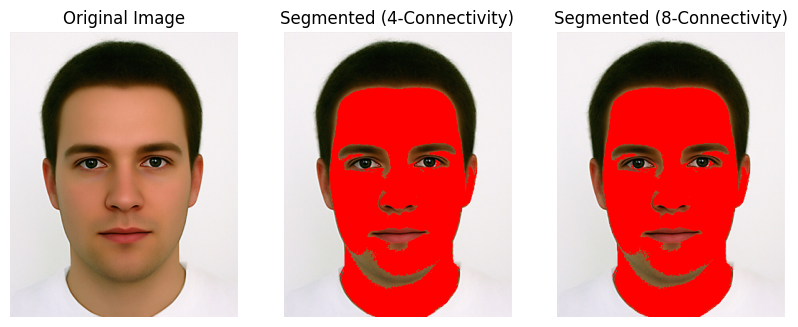

In [64]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(segmented_image_4)
plt.title("Segmented (4-Connectivity)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(segmented_image_8)
plt.title("Segmented (8-Connectivity)")
plt.axis("off")

plt.show()